# Interactive Visualizations with Bokeh

## Importing needed Libraries

In [171]:
import pandas as pd
import numpy as np
import bokeh.sampledata
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Import the Data

In [172]:
df = pd.read_csv('raindata.csv')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     140787 non-null  int64  
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [174]:
print(df.shape)

(140787, 25)


In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,140787.0,72973.534133,42089.082058,0.00,36230.5,73501.0,109319.5,145458.00
MinTemp,140787.0,12.188607,6.395989,-6.20,7.6,12.0,16.8,30.60
MaxTemp,140787.0,23.237980,7.092969,2.45,17.9,22.6,28.2,43.65
Rainfall,140787.0,0.485723,0.791851,0.00,0.0,0.0,0.8,2.00
Evaporation,140787.0,3.553537,3.536350,0.00,0.0,3.1,5.6,14.00
Sunshine,140787.0,4.944860,4.673046,0.00,0.0,5.0,9.4,14.50
WindGustSpeed,140787.0,38.272632,14.061123,6.00,30.0,37.0,46.0,70.00
WindSpeed9am,140787.0,13.882567,8.567498,0.00,7.0,13.0,19.0,37.00
WindSpeed3pm,140787.0,18.469773,8.495757,0.00,13.0,19.0,24.0,40.50
Humidity9am,140787.0,68.955514,18.853151,18.00,57.0,70.0,83.0,100.00


In [176]:
df.describe(include=[object]).T

,count,unique,top,freq
Location,140787,49,Canberra,3402
WindGustDir,140787,16,W,17007
WindDir9am,140787,16,N,12150
WindDir3pm,140787,16,SE,11859
RainToday,140787,2,No,109332
RainTomorrow,140787,2,No,109586


## EDA

<AxesSubplot:>

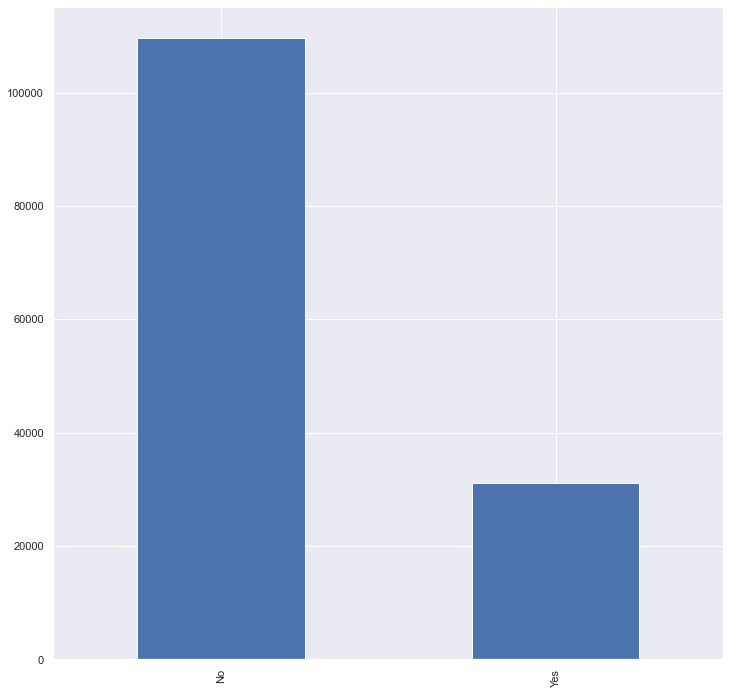

In [177]:
df['RainTomorrow'].value_counts().plot(kind='bar')

In [178]:
df.RainTomorrow = df.RainTomorrow.map({'No':0, 'Yes':1}).astype('float64')

<AxesSubplot:>

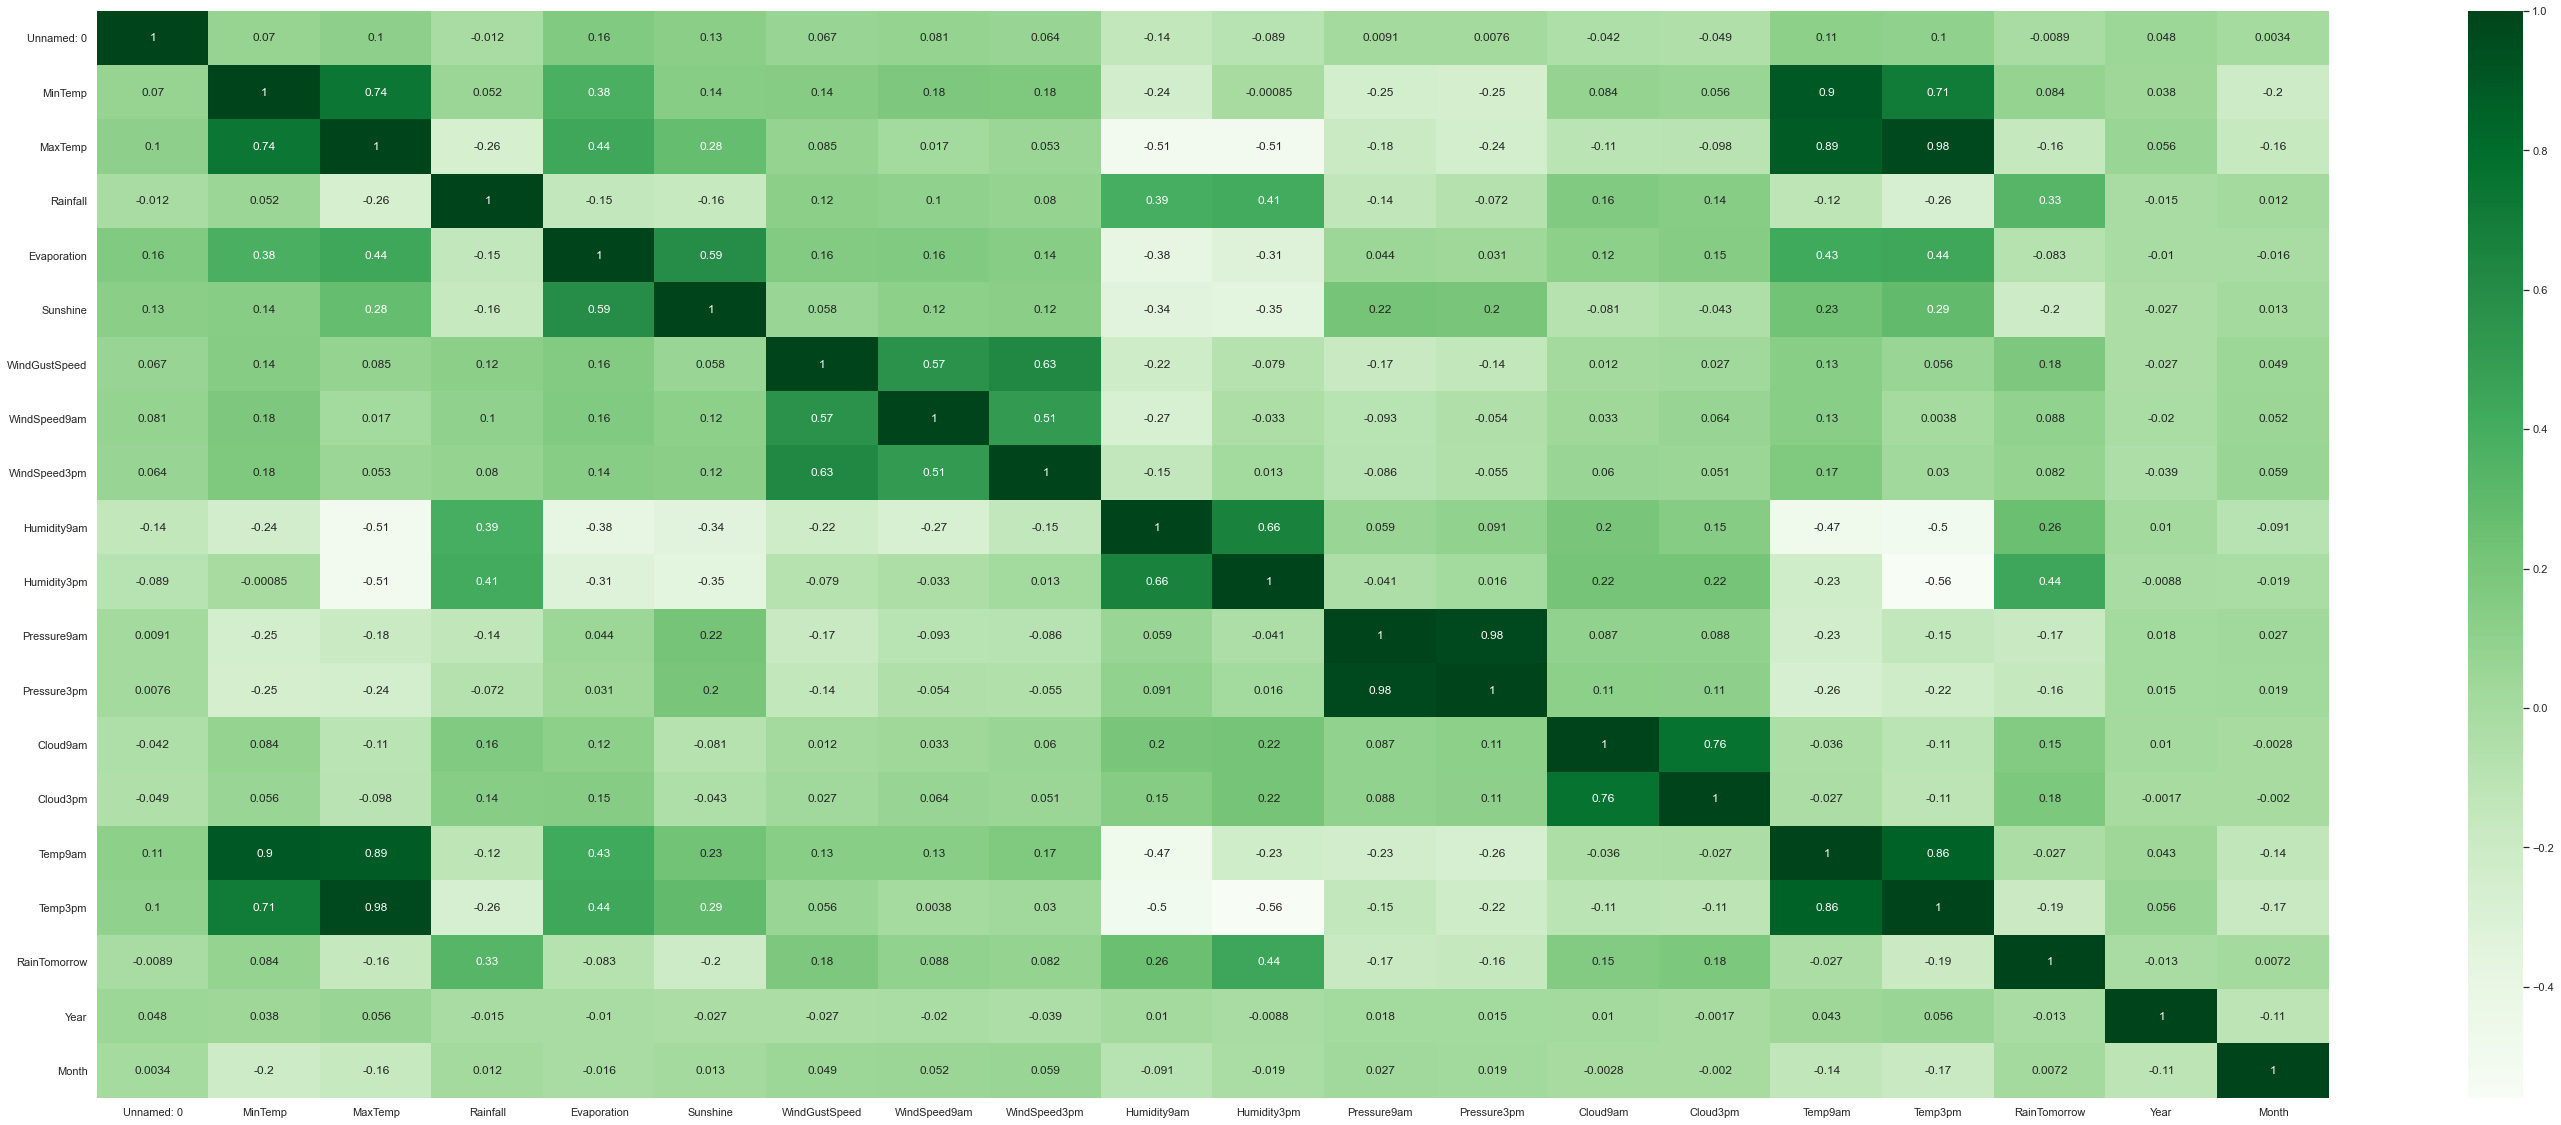

In [179]:
corr = df.corr()
corr.style.background_gradient()

plt.figure(figsize=(50,20))
sns.heatmap(corr,annot=True,cmap='Greens')

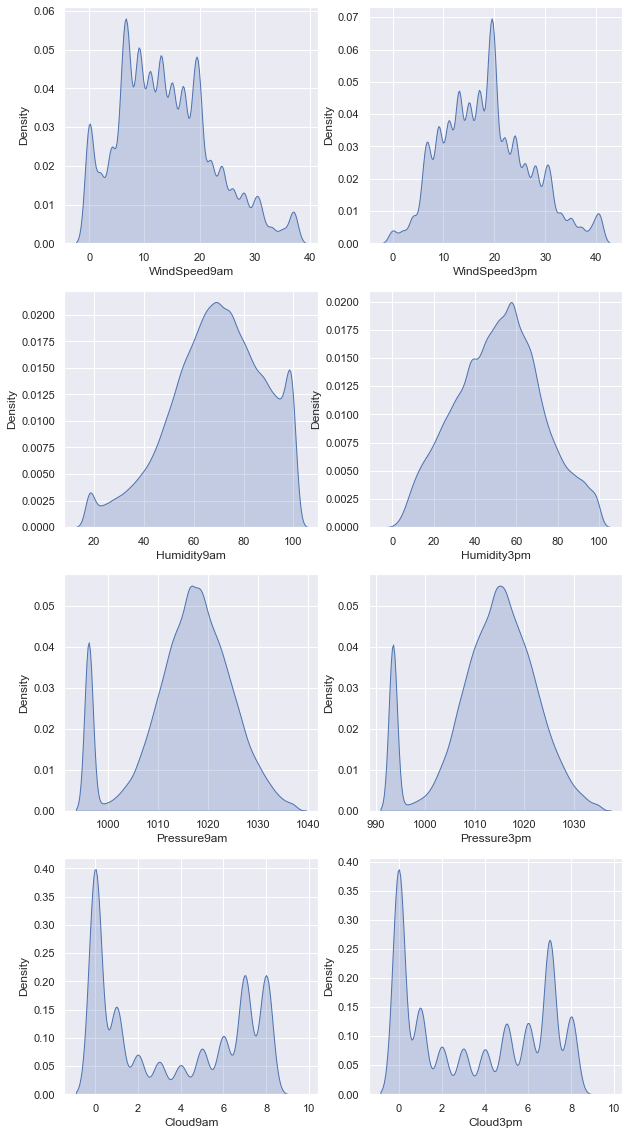

In [180]:
fig, ax = plt.subplots(4, 2, figsize = (10, 20))
sns.kdeplot(x = df.WindSpeed9am, ax = ax [0, 0], shade = True)
sns.kdeplot(x = df.WindSpeed3pm, ax = ax[0, 1], shade = True)
sns.kdeplot(x = df.Humidity9am, ax = ax[1, 0], shade = True)
sns.kdeplot(x = df.Humidity3pm, ax = ax[1, 1], shade = True)
sns.kdeplot(x = df.Pressure9am, ax = ax[2, 0], shade=True)
sns.kdeplot(x = df.Pressure3pm, ax = ax[2, 1], shade=True)
sns.kdeplot(x = df.Cloud9am, ax = ax[3, 0], shade=True)
sns.kdeplot(x = df.Cloud3pm, ax = ax[3, 1], shade=True);

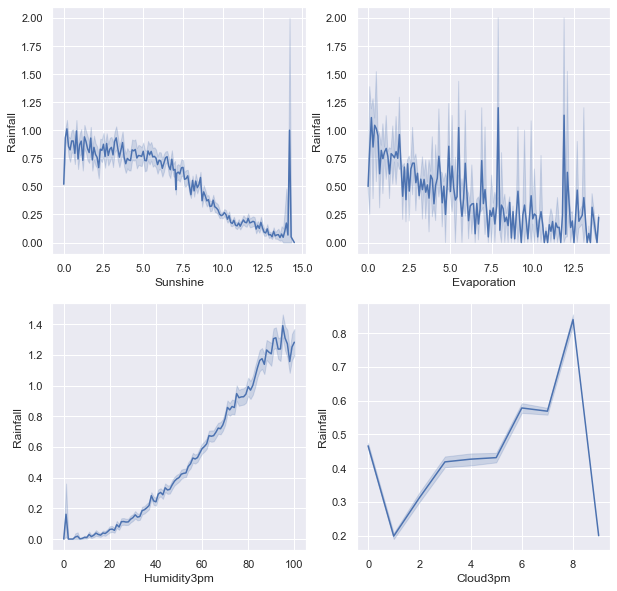

In [181]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.lineplot(data = df, x = 'Sunshine', y = 'Rainfall', ax = ax [0, 0])
sns.lineplot(data = df, x = 'Evaporation', y = 'Rainfall', ax = ax [0, 1])
sns.lineplot(data = df, x = 'Humidity3pm', y = 'Rainfall', ax = ax [1, 0])
sns.lineplot(data = df, x = 'Cloud3pm', y = 'Rainfall', ax = ax [1, 1]);

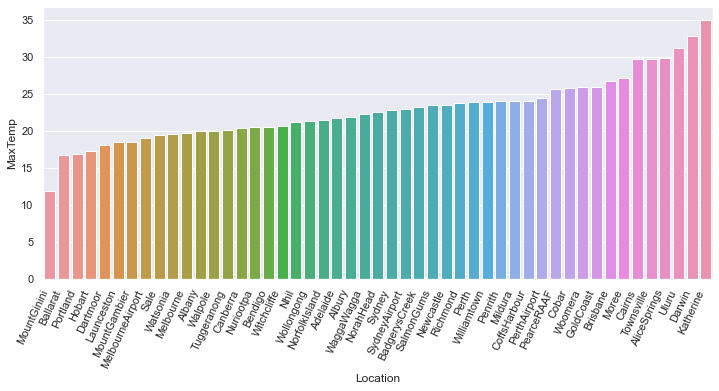

In [182]:
loc_temp = df.groupby(['Location'])['MaxTemp'].median().reset_index()
plt.figure(figsize = (12, 5))
loc = sns.barplot(data = loc_temp, y = 'MaxTemp', x = 'Location', order = loc_temp.sort_values('MaxTemp').Location)
loc.set_xticklabels(loc.get_xticklabels(), rotation = 65, horizontalalignment = 'right');

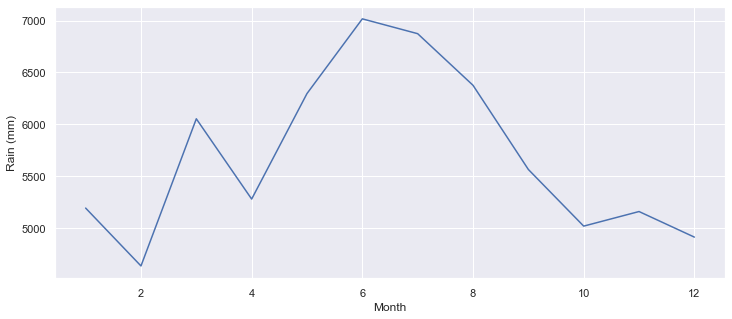

In [183]:
fig, (plot1) = plt.subplots(1, figsize = (12, 5))
monthly = df.groupby(['Month'])['Rainfall'].sum().reset_index()
plot1.plot(monthly.Month, monthly.Rainfall)
plot1.set_xlabel('Month')
plot1.set_ylabel('Rain (mm)');

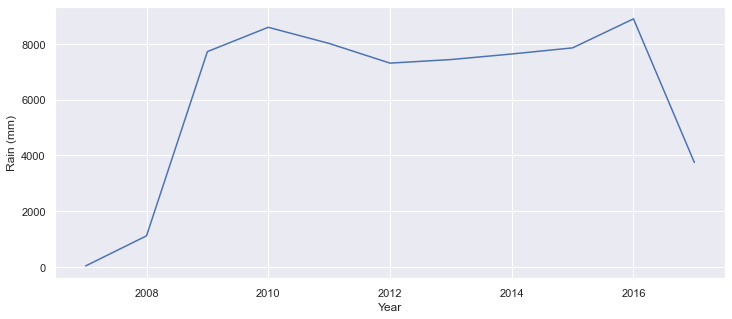

In [184]:
fig, (plot2) = plt.subplots(1, figsize = (12, 5))
yearly = df.groupby(['Year'])['Rainfall'].sum().reset_index()
plot2.plot(yearly.Year, yearly.Rainfall)
plot2.set_xlabel('Year')
plot2.set_ylabel('Rain (mm)');

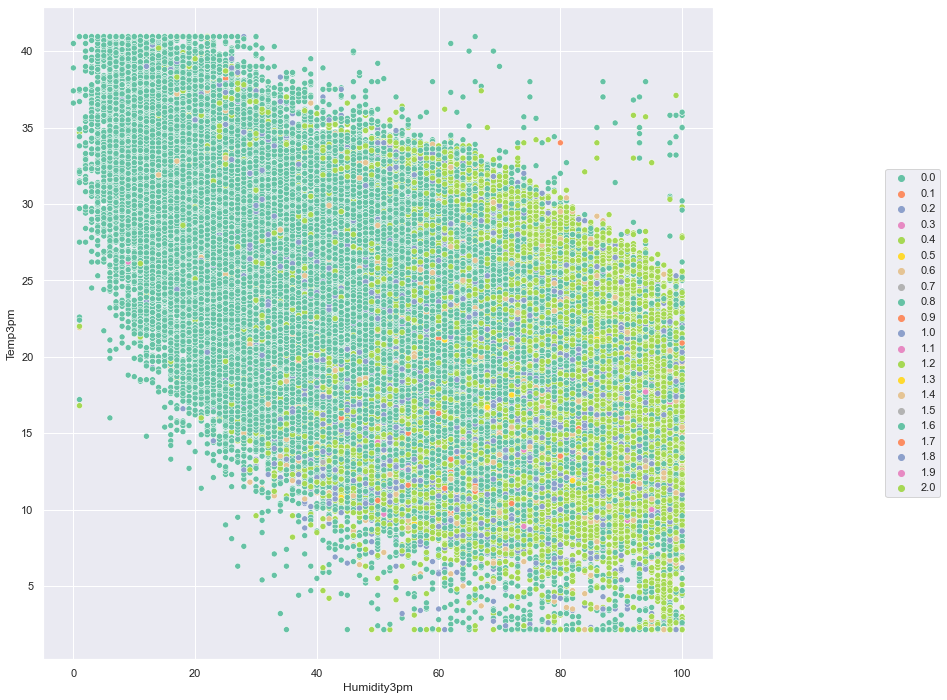

In [185]:
sns.set(rc = {'figure.figsize':(12,12)})
pop = sns.scatterplot(data = df,x = 'Humidity3pm', y = 'Temp3pm', hue = 'Rainfall', palette = 'Set2')
pop.legend(loc = 'center left', bbox_to_anchor = (1.25, 0.5), ncol = 1)

# Interactive Visualizations with Bokeh

In [186]:
from bokeh.plotting import figure, show, output_file, save, output_notebook
from bokeh.models import Div, RangeSlider, Spinner, BoxAnnotation, NumeralTickFormatter, DatetimeTickFormatter
from bokeh.layouts import layout, row, gridplot
from bokeh.io import curdoc
from bokeh.models.tools import BoxZoomTool, ResetTool, PanTool
from bokeh.palettes import Turbo256
from bokeh.transform import linear_cmap
from bokeh.models import ColumnDataSource, CDSView, IndexFilter, GroupFilter, HoverTool

## Monthly Rainfall

In [187]:
monthly = df.groupby(['Month'])['Rainfall'].sum().reset_index()

In [188]:
x = monthly.Month
y = monthly.Rainfall

Monthly_Rain = figure(x_range = (1,12), width = 500, height = 250)
points = Monthly_Rain.circle(x = x, y = y, size = 30, fill_color = "#21a7df")

div = Div(text = """<p>Select the circle's size using this control element:</p>""", width = 200, height = 30)

spinner = Spinner(title = "Circle size", low = 0, high = 40, step = 5, value = points.glyph.size, width = 200)
spinner.js_link("value", points.glyph, "size")

range_slider = RangeSlider(title = "Adjust x-axis range", start = 0, end = 13, step = 1, 
                           value=(Monthly_Rain.x_range.start, Monthly_Rain.x_range.end))

range_slider.js_link("value", Monthly_Rain.x_range, "start", attr_selector = 0)
range_slider.js_link("value", Monthly_Rain.x_range, "end", attr_selector = 1)

In [189]:
Monthlayout = layout([[div, spinner], [range_slider], [Monthly_Rain]])

show(Monthlayout)

## Yearly Rainfall

In [190]:
yearly = df.groupby(['Year'])['Rainfall'].sum().reset_index()

In [191]:
x1 = yearly.Year
y1 = yearly.Rainfall

Yearly_Rain = figure(x_range = (2006,2018), width = 500, height = 250)
points = Yearly_Rain.circle(x = x1, y = y1, size = 30, fill_color = "#21a7df")

div = Div(text = """<p>Select the circle's size using this control element:</p>""", width = 200, height = 30)

spinner = Spinner(title = "Circle size", low = 0, high = 40, step = 5, value = points.glyph.size, width = 200)
spinner.js_link("value", points.glyph, "size")

range_slider = RangeSlider(title = "Adjust x-axis range", start = 2006, end = 2018, step = 1, 
                           value=(Yearly_Rain.x_range.start, Yearly_Rain.x_range.end))

range_slider.js_link("value", Yearly_Rain.x_range, "start", attr_selector = 0)
range_slider.js_link("value", Yearly_Rain.x_range, "end", attr_selector = 1)

In [192]:
Yearlayout = layout([[div, spinner], [range_slider], [Yearly_Rain]])

show(Yearlayout)